In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import scipy.stats as st
import numpy as np

In [44]:
# Read the final restaurant data
# Split the "Address" column into "City", "State" and "Country"
data_df = pd.read_csv('Resources/LargeSample.csv')
data_df[["City",'State','Country','0']] = data_df['Address'].str.split(',',expand=True)
data_df[["Number",'City']] = data_df['City'].str.split(' ',expand=True, n=1)
data_df

,Place ID,Name,Latitude,Longitude,Address,Rating,Ratings count,Price range,City,State,Country,0,Number
0,ChIJZQ6BEXZe14AR6olrRzitFFc,Subway,32.849288,-115.569706,"RCXJ+P4 Imperial, CA, USA",4.2,72,1,Imperial,CA,USA,None,RCXJ+P4
1,ChIJG3vjvDda14ARQQpdsyPpiZM,Subway,32.962409,-115.545849,"XF63+XM Brawley, CA, USA",3.9,24,1,Brawley,CA,USA,None,XF63+XM
2,ChIJ65WooQpe14ARe5yAyhIps28,Maranatha Steakhouse,32.841779,-115.568291,"RCRJ+PM Imperial, CA, USA",4.5,310,2,Imperial,CA,USA,None,RCRJ+PM
3,ChIJP646YhRa14ARqb8dCyn0i5s,Pizza Hut,32.978951,-115.547330,"XFH3+H3 Brawley, CA, USA",4.2,257,1,Brawley,CA,USA,None,XFH3+H3
4,ChIJH3Qkemla14ARaPGcgMIywEM,Little Caesars Pizza,32.978710,-115.537636,"XFH6+FW Brawley, CA, USA",4.4,193,1,Brawley,CA,USA,None,XFH6+FW
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33969,ChIJIySXp6-t1oYRtZjbmxiHX80,Subway,31.364264,-110.941297,"9375+PF Nogales, AZ, USA",4.3,139,1,Nogales,AZ,USA,None,9375+PF
33970,ChIJr1R0p6-t1oYRcBIFc2WNaNM,Little Caesars Pizza,31.364300,-110.941260,"9375+PF Nogales, AZ, USA",3.8,218,1,Nogales,AZ,USA,None,9375+PF
33971,ChIJPYr3nq-t1oYREZG2HnWHtfQ,McDonald's,31.366891,-110.939697,"9386+Q4 Nogales, AZ, USA",4.1,1640,1,Nogales,AZ,USA,None,9386+Q4
33972,ChIJJY8bXC2s1oYR5Hz3sDrizpc,Gariola Coffee House,31.366276,-110.934318,"9388+G7 Nogales, AZ, USA",4.7,99,2,Nogales,AZ,USA,None,9388+G7


In [46]:
# Checking the total number of rows.
data_df.count()

Place ID         33974
Name             33974
Latitude         33974
Longitude        33974
Address          33974
Rating           33974
Ratings count    33974
Price range      33974
City             33974
State            33974
Country          33974
0                  333
Number           33974
dtype: int64

In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
#   and SEM of the Ratings for each State

# Use groupby and summary statistical methods to calculate the following properties 
#   of each State: 

state_df = data_df.groupby(['Country'])['Rating'].mean().nlargest(10)
state_df

Country
 LA    4.500000
 PA    4.500000
 NJ    4.466667
 MI    4.426667
 MD    4.400000
 RI    4.400000
 CA    4.386957
 VT    4.381818
 OR    4.363158
 AR    4.266667
Name: Rating, dtype: float64

Text(0, 0.5, 'Average Rating (mean)')

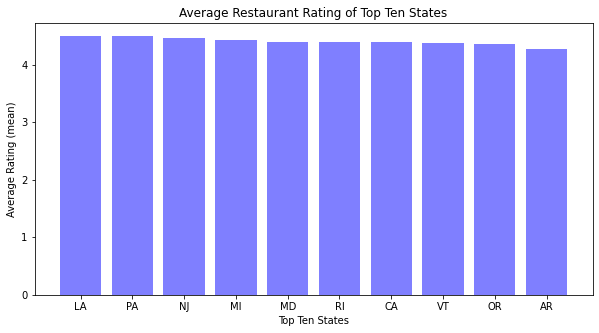

In [56]:
# Generate a bar plot showing the median rating of each state using pyplot.

x_axis = np.arange(len(state_df))

# plt.figure(figsize=(20,3))
fig = plt.figure(figsize=(10,5))
plt.bar(x_axis, state_df, color='b', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["LA", "PA", "NJ", "MI", "MD", "RI", "CA", "VT", "OR", 
                            "AR"], rotation=0)

plt.title("Average Restaurant Rating of Top Ten States")
plt.xlabel("Top Ten States")
plt.ylabel("Average Rating (mean)")

In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
#   and SEM of the Ratings for each State

# Use groupby and summary statistical methods to calculate the following properties 
#   of each State: 

state_df = data_df.groupby(['Country'])['Rating'].mean().nsmallest(10)
state_df

Country
 IN    3.400000
 NC    3.728571
 NY    3.833333
 TN    3.900000
 UT    3.950000
 NM    4.000000
 AZ    4.031818
 CT    4.066667
 FL    4.067742
 NV    4.083333
Name: Rating, dtype: float64

Text(0, 0.5, 'Average Rating (mean)')

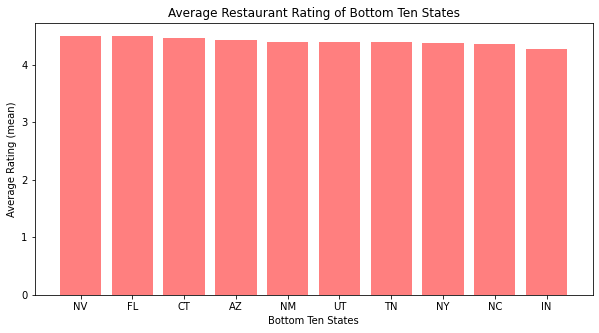

In [58]:
# Generate a bar plot showing the median rating of each state using pyplot.

x_axis = np.arange(len(state_df))

# plt.figure(figsize=(20,3))
fig = plt.figure(figsize=(10,5))
plt.bar(x_axis, state_df, color='r', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["NV", "FL", "CT", "AZ", "NM", "UT", "TN", "NY", "NC", 
                            "IN"], rotation=0)

plt.title("Average Restaurant Rating of Bottom Ten States")
plt.xlabel("Bottom Ten States")
plt.ylabel("Average Rating (mean)")

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
#   and SEM of the Ratings for each State

# Use groupby and summary statistical methods to calculate the following properties 
#   of each State: 

city_df = data_df.groupby(['City'])['Rating'].mean().nlargest(10)
city_df

City
Allons             5.0
Baileyville        5.0
Bluebell           5.0
Carpentersville    5.0
Constableville     5.0
Harrington         5.0
Jetmore            5.0
Red Lake Falls     5.0
Stockdale          5.0
Apple Springs      4.9
Name: Rating, dtype: float64

Text(0, 0.5, 'Average Rating (mean)')

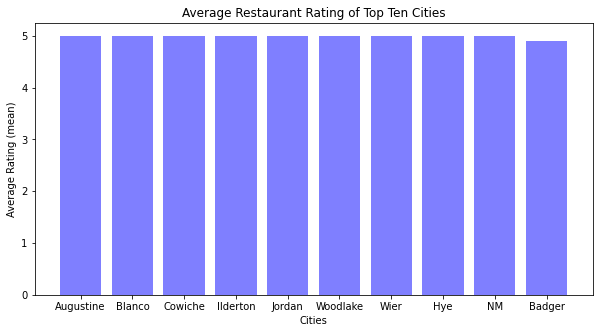

In [59]:
# Generate a bar plot showing the median rating of each state using pyplot.

x_axis = np.arange(len(city_df))

# plt.figure(figsize=(20,3))
fig = plt.figure(figsize=(10,5))
plt.bar(x_axis, city_df, color='b', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Augustine", "Blanco", "Cowiche", "Ilderton", "Jordan", "Woodlake", "Wier", "Hye", "NM", 
                            "Badger", "MS", "Driscoll"], rotation=0)

plt.title("Average Restaurant Rating of Top Ten Cities")
plt.xlabel("Cities")
plt.ylabel("Average Rating (mean)")

In [10]:
# Table of Std Dev of State Restuarat Ratings

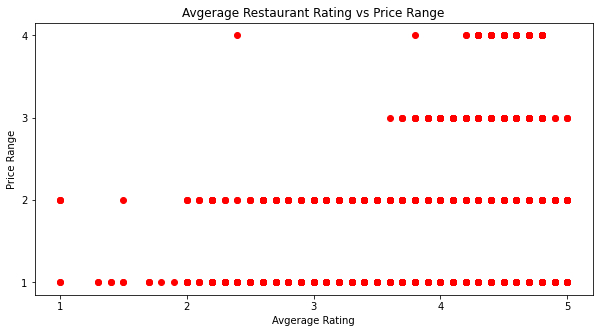

In [36]:
# Define the scatter plot variables
x_axis = data_df['Rating']
price = data_df['Price range']

# Set tick intervals
x = [1,2,3,4,5]
y = [0,1,2,3,4]

# Display the plot title and the axis labels
fig = plt.figure(figsize=(10,5))
plt.title("Avgerage Restaurant Rating vs Price Range")
plt.xlabel("Avgerage Rating")
plt.ylabel("Price Range")
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(min(y), max(x)+1, 1.0))

# Display the scatter plot
plt.scatter(x_axis, price, marker="o", color="red")
# plt.show()